# Finding the most efficient sizes for the Front and the Rear blockers of a 7-shell FOXSI module

## Feb, 2018
## @Milo

## Let's start by Finding the most efficient Front Blocker with no Rear Blocker emulating what was done by Marshall:

<img src="../Slides/ron_sim7.png",width=900,height=600>

## Marshall's Data

In [52]:
RonD_F379_NR = [3.457, 3.248, 2.829, 2.407, 1.974,1.626, 0., 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F377_NR = [3.456, 3.377, 3.064, 2.649, 2.237, 1.837, 0., 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F375_NR = [3.454, 3.38, 3.083, 2.794, 2.445, 2.047, 0.009 , 0., 0., 0., 0., 0., 0., 0., 0.]
RonD_F286_NR = [3.421, 3.454, 3.14, 2.865, 2.539, 2.227, 0.087, 0., 0., 0., 0., 0., 0., 0., 0.]

RonP_F379_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.024, 0.151, 0.221, 0.263, 0.286, 0.309 ]
RonP_F377_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.025, 0.171, 0.256, 0.299, 0.341, 0.357 ]
RonP_F375_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.029, 0.182, 0.287, 0.343, 0.375, 0.414 ]
RonP_F286_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.031, 0.185, 0.436, 0.593, 0.687, 0.805 ]


RonH_F379_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.044, 0.168, 0.232, 0.232, 0.179 ]
RonH_F377_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.06, 0.21, 0.257, 0.225, 0.177 ]
RonH_F375_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.095, 0.236, 0.254, 0.221, 0.183 ]
RonH_F286_NR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.01, 0.138, 0.239, 0.251, 0.222, 0.167 ]

## Front = 2.8575cm No Rear 

In [11]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 2.8575
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F286_NR_All_Drays, F286_NR_All_Hrays, F286_NR_All_Prays = [], [], []
F286_NR_All_Dx, F286_NR_All_Dy, F286_NR_All_Hx, F286_NR_All_Hy, F286_NR_All_Px, F286_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F286_NR_All_Drays.append(Drays)
    F286_NR_All_Hrays.append(Hrays)
    F286_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Hx.append(Hx)
    F286_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F286_NR_All_Px.append(Px)
    F286_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Dx.append(Dx)
    F286_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F286R000/rays_Angle_=_14.0.csv loaded.
Rays from /Us

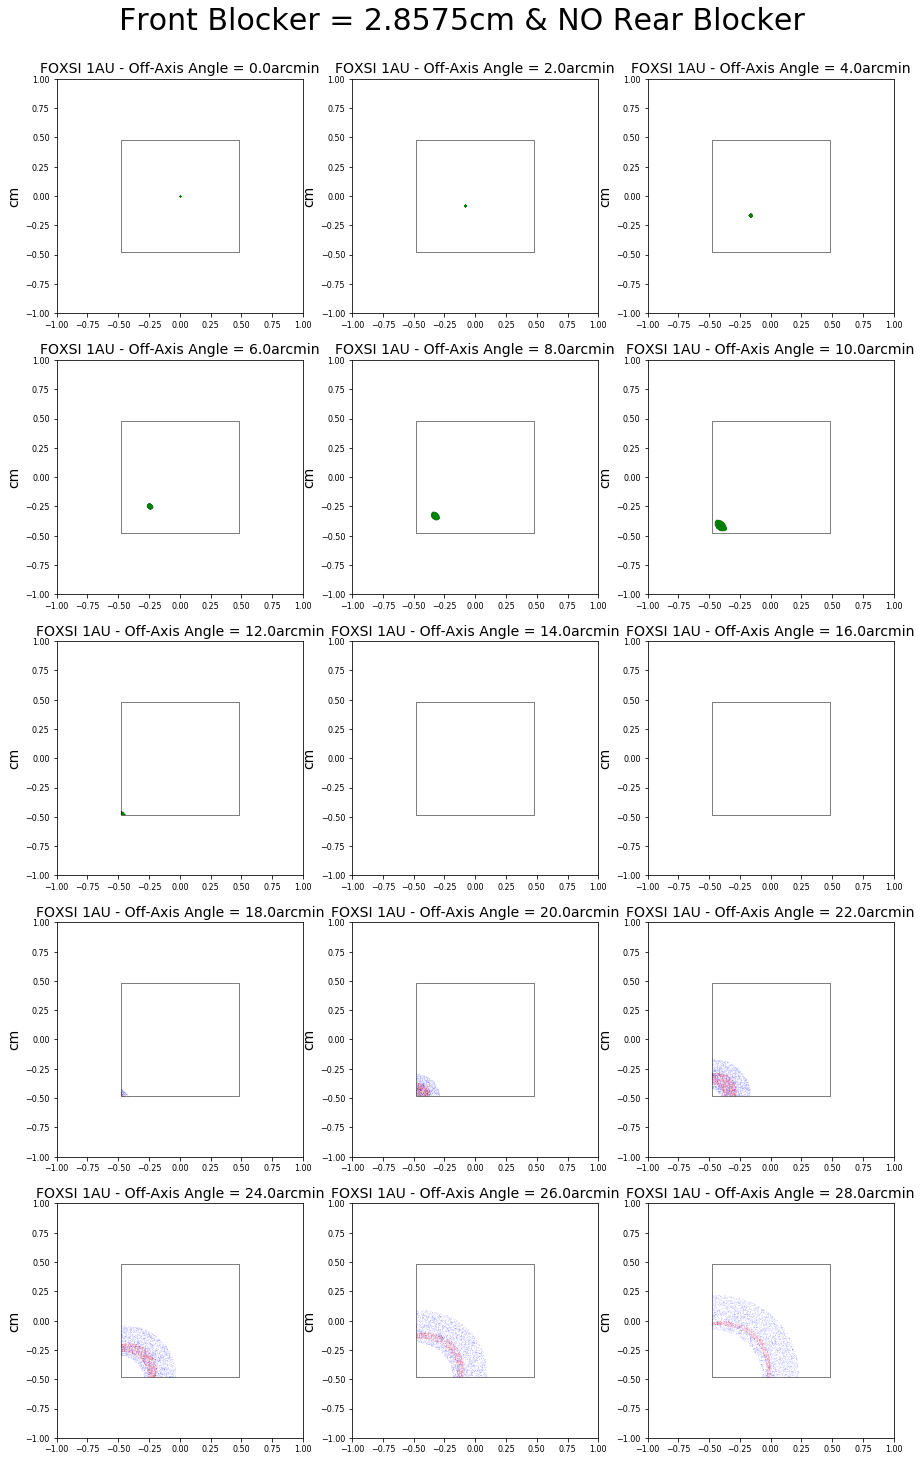

In [27]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 2.8575cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F286_NR_All_Hx[i],F286_NR_All_Hy[i],color='red',s=0.001,alpha=0.8)
    plt.scatter(F286_NR_All_Px[i],F286_NR_All_Py[i],color='blue',s=0.001,alpha=0.8)
    plt.scatter(F286_NR_All_Dx[i],F286_NR_All_Dy[i],color='green',s=0.001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [13]:
Rout = 3.94
fbr = 2.8575
F286_NR_Doubles, F286_NR_Hyp, F286_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F286_NR_Doubles.append(len(F286_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F286_NR_Hyp.append(len(F286_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F286_NR_Par.append(len(F286_NR_All_Prays[i]) * (Rout**2 - fbr**2))

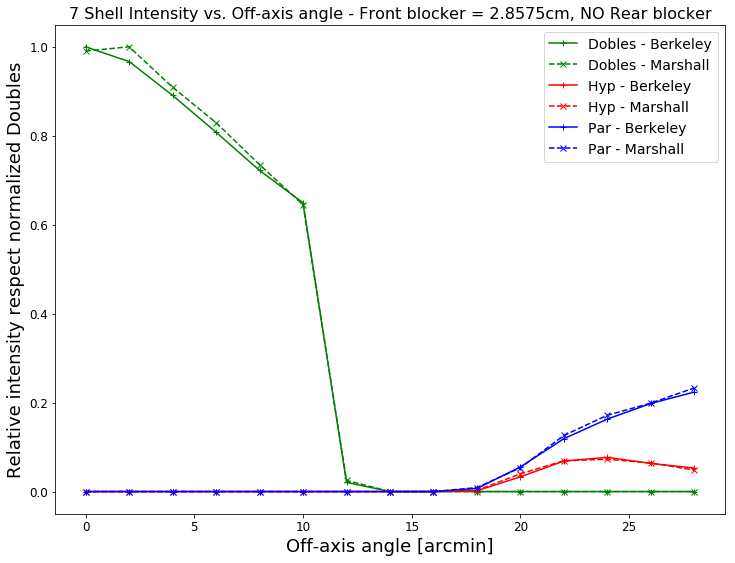

In [21]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7 Shell Intensity vs. Off-axis angle - Front blocker = 2.8575cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'g+-',label='Dobles - Berkeley')
plt.plot(offaxisAngles, RonD_F286_NR/max(np.array(RonD_F286_NR)),'gx--',label='Dobles - Marshall')
plt.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'r+-',label='Hyp - Berkeley')
plt.plot(offaxisAngles, RonH_F286_NR/max(np.array(RonD_F286_NR)),'rx--',label='Hyp - Marshall')
plt.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'b+-',label='Par - Berkeley')
plt.plot(offaxisAngles, RonP_F286_NR/max(np.array(RonD_F286_NR)),'bx--',label='Par - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## Front = 3.74936cm No Rear 

In [29]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_NR_All_Drays, F375_NR_All_Hrays, F375_NR_All_Prays = [], [], []
F375_NR_All_Dx, F375_NR_All_Dy, F375_NR_All_Hx, F375_NR_All_Hy, F375_NR_All_Px, F375_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_NR_All_Drays.append(Drays)
    F375_NR_All_Hrays.append(Hrays)
    F375_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_NR_All_Hx.append(Hx)
    F375_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_NR_All_Px.append(Px)
    F375_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_NR_All_Dx.append(Dx)
    F375_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_14.0.csv loaded.
Rays from /Us

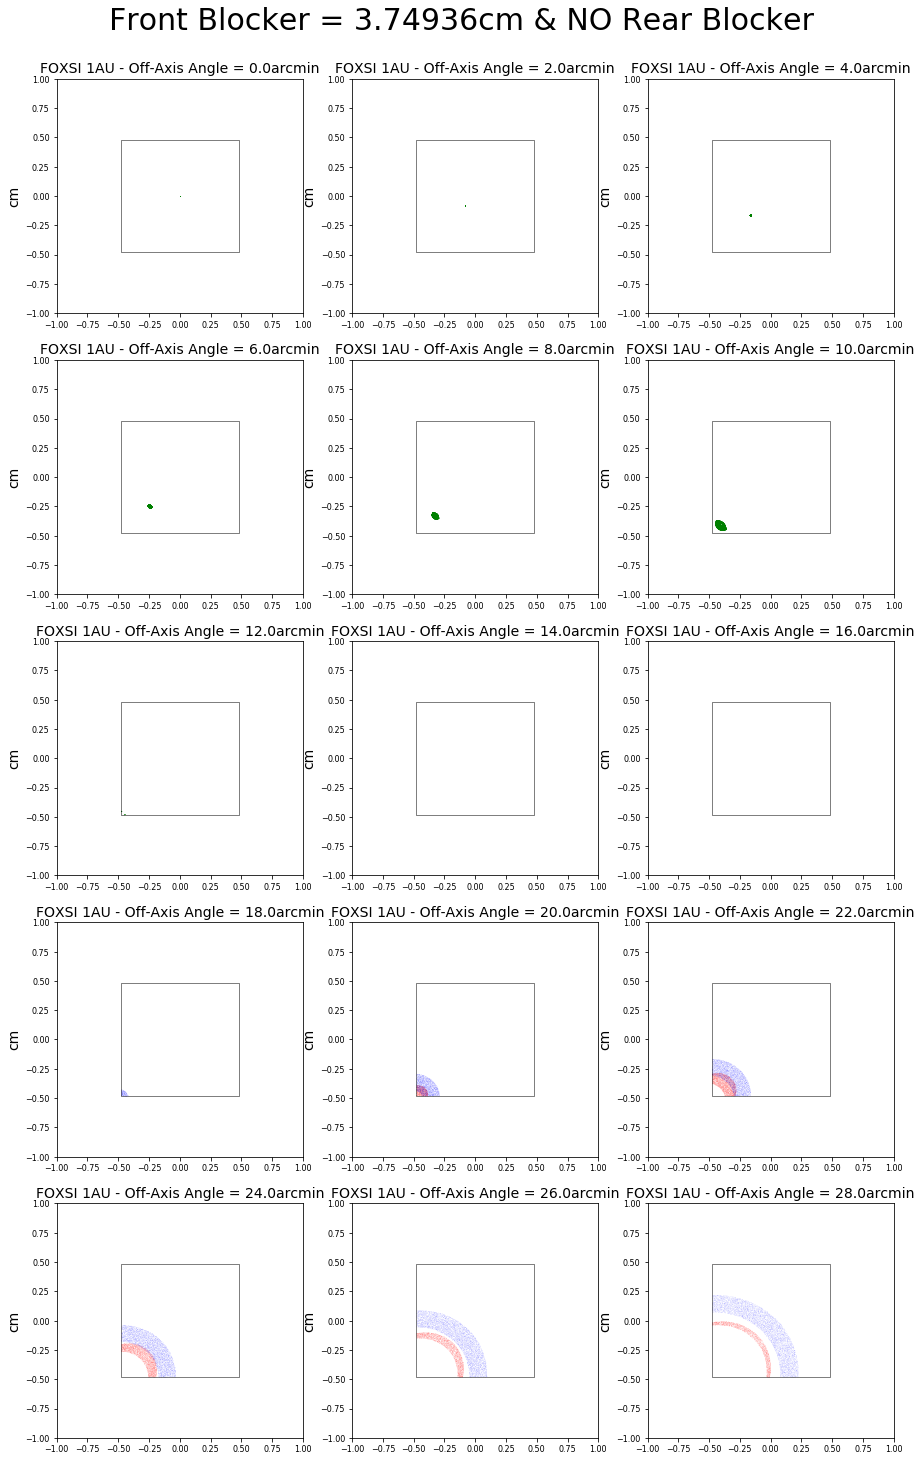

In [34]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.74936cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F375_NR_All_Hx[i],F375_NR_All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(F375_NR_All_Px[i],F375_NR_All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(F375_NR_All_Dx[i],F375_NR_All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [31]:
Rout = 3.94
fbr = 3.74936
F375_NR_Doubles, F375_NR_Hyp, F375_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_NR_Doubles.append(len(F375_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_NR_Hyp.append(len(F375_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_NR_Par.append(len(F375_NR_All_Prays[i]) * (Rout**2 - fbr**2))

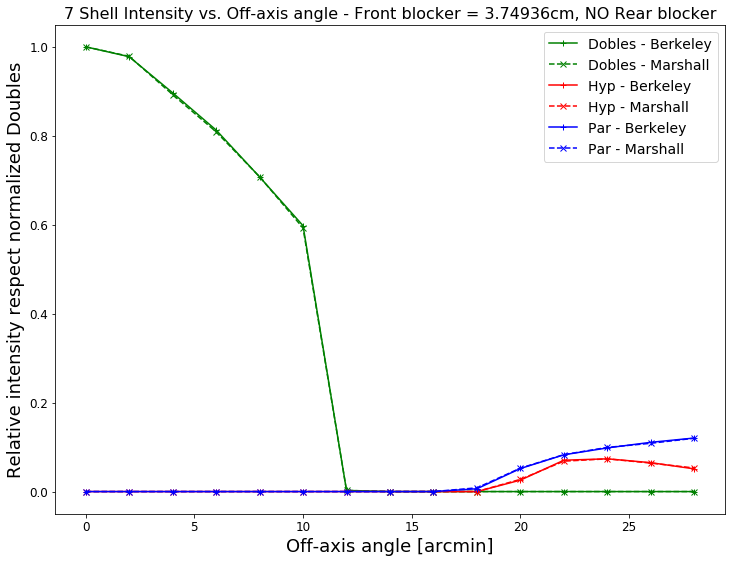

In [35]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7 Shell Intensity vs. Off-axis angle - Front blocker = 3.74936cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F375_NR_Doubles/max(np.array(F375_NR_Doubles)),'g+-',label='Dobles - Berkeley')
plt.plot(offaxisAngles, RonD_F375_NR/max(np.array(RonD_F375_NR)),'gx--',label='Dobles - Marshall')
plt.plot(offaxisAngles, F375_NR_Hyp/max(np.array(F375_NR_Doubles)),'r+-',label='Hyp - Berkeley')
plt.plot(offaxisAngles, RonH_F375_NR/max(np.array(RonD_F375_NR)),'rx--',label='Hyp - Marshall')
plt.plot(offaxisAngles, F375_NR_Par/max(np.array(F375_NR_Doubles)),'b+-',label='Par - Berkeley')
plt.plot(offaxisAngles, RonP_F375_NR/max(np.array(RonD_F375_NR)),'bx--',label='Par - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## Front = 3.7750cm No Rear 

In [39]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.7750
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F377_NR_All_Drays, F377_NR_All_Hrays, F377_NR_All_Prays = [], [], []
F377_NR_All_Dx, F377_NR_All_Dy, F377_NR_All_Hx, F377_NR_All_Hy, F377_NR_All_Px, F377_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F377_NR_All_Drays.append(Drays)
    F377_NR_All_Hrays.append(Hrays)
    F377_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F377_NR_All_Hx.append(Hx)
    F377_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F377_NR_All_Px.append(Px)
    F377_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F377_NR_All_Dx.append(Dx)
    F377_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F377R000/rays_Angle_=_14.0.csv loaded.
Rays from /Us

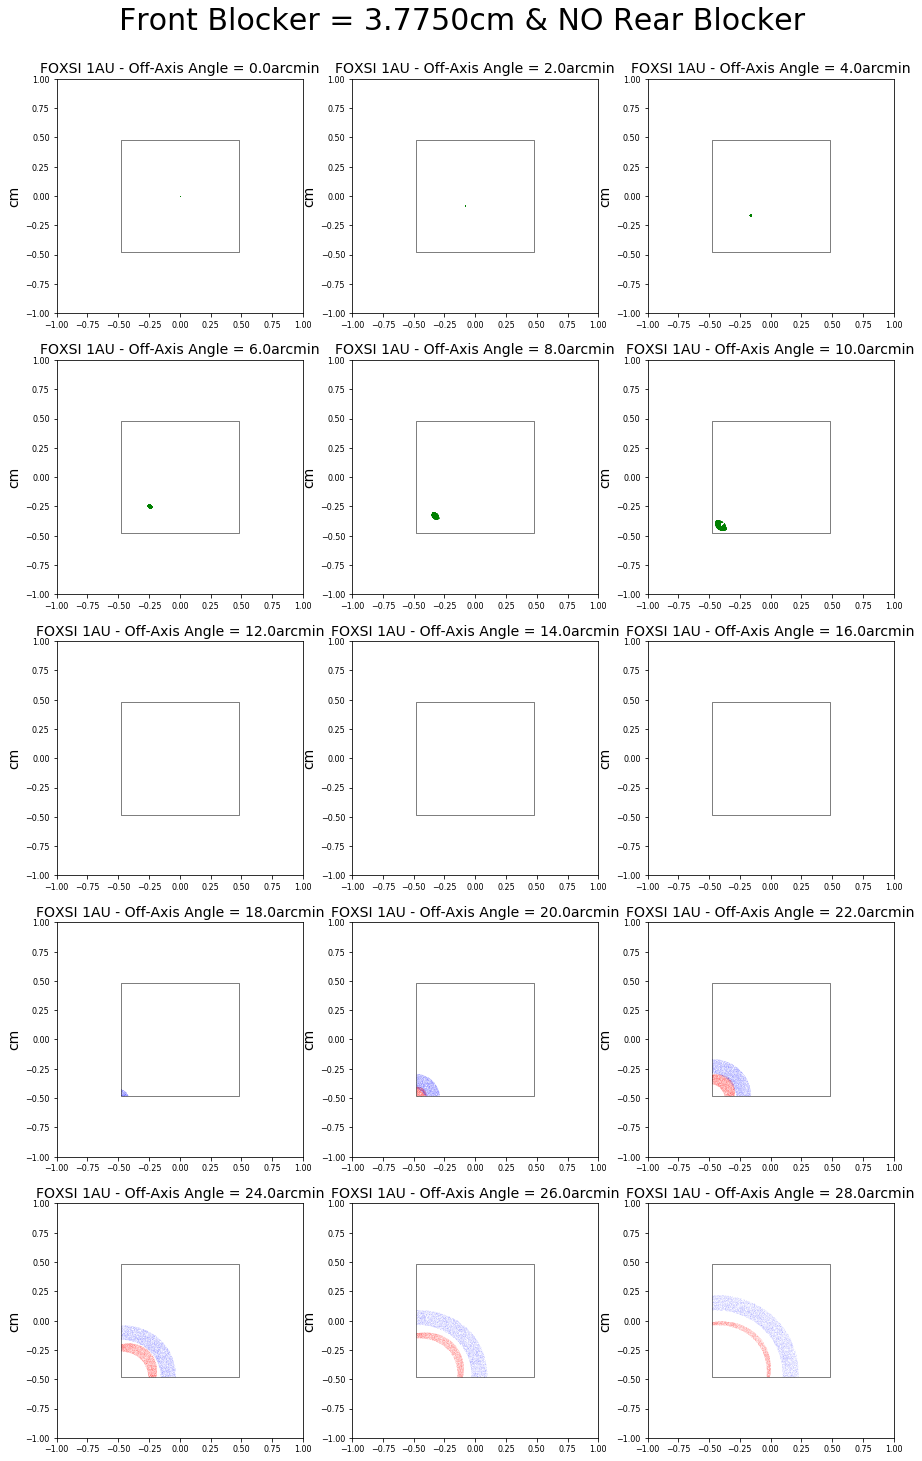

In [47]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.7750cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F377_NR_All_Hx[i],F377_NR_All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(F377_NR_All_Px[i],F377_NR_All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(F377_NR_All_Dx[i],F377_NR_All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [41]:
Rout = 3.94
fbr = 3.7750
F377_NR_Doubles, F377_NR_Hyp, F377_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F377_NR_Doubles.append(len(F377_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F377_NR_Hyp.append(len(F377_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F377_NR_Par.append(len(F377_NR_All_Prays[i]) * (Rout**2 - fbr**2))

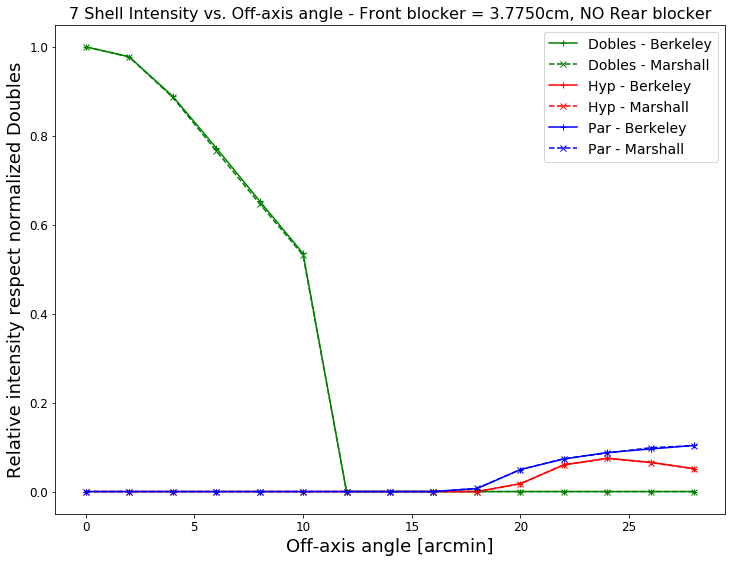

In [48]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7 Shell Intensity vs. Off-axis angle - Front blocker = 3.7750cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F377_NR_Doubles/max(np.array(F377_NR_Doubles)),'g+-',label='Dobles - Berkeley')
plt.plot(offaxisAngles, RonD_F377_NR/max(np.array(RonD_F377_NR)),'gx--',label='Dobles - Marshall')
plt.plot(offaxisAngles, F377_NR_Hyp/max(np.array(F377_NR_Doubles)),'r+-',label='Hyp - Berkeley')
plt.plot(offaxisAngles, RonH_F377_NR/max(np.array(RonD_F377_NR)),'rx--',label='Hyp - Marshall')
plt.plot(offaxisAngles, F377_NR_Par/max(np.array(F377_NR_Doubles)),'b+-',label='Par - Berkeley')
plt.plot(offaxisAngles, RonP_F377_NR/max(np.array(RonD_F377_NR)),'bx--',label='Par - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

## Front = 3.7990cm No Rear 

In [53]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.7990
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F379_NR_All_Drays, F379_NR_All_Hrays, F379_NR_All_Prays = [], [], []
F379_NR_All_Dx, F379_NR_All_Dy, F379_NR_All_Hx, F379_NR_All_Hy, F379_NR_All_Px, F379_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F379_NR_All_Drays.append(Drays)
    F379_NR_All_Hrays.append(Hrays)
    F379_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F379_NR_All_Hx.append(Hx)
    F379_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F379_NR_All_Px.append(Px)
    F379_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F379_NR_All_Dx.append(Dx)
    F379_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F379R000/rays_Angle_=_14.0.csv loaded.
Rays from /Us

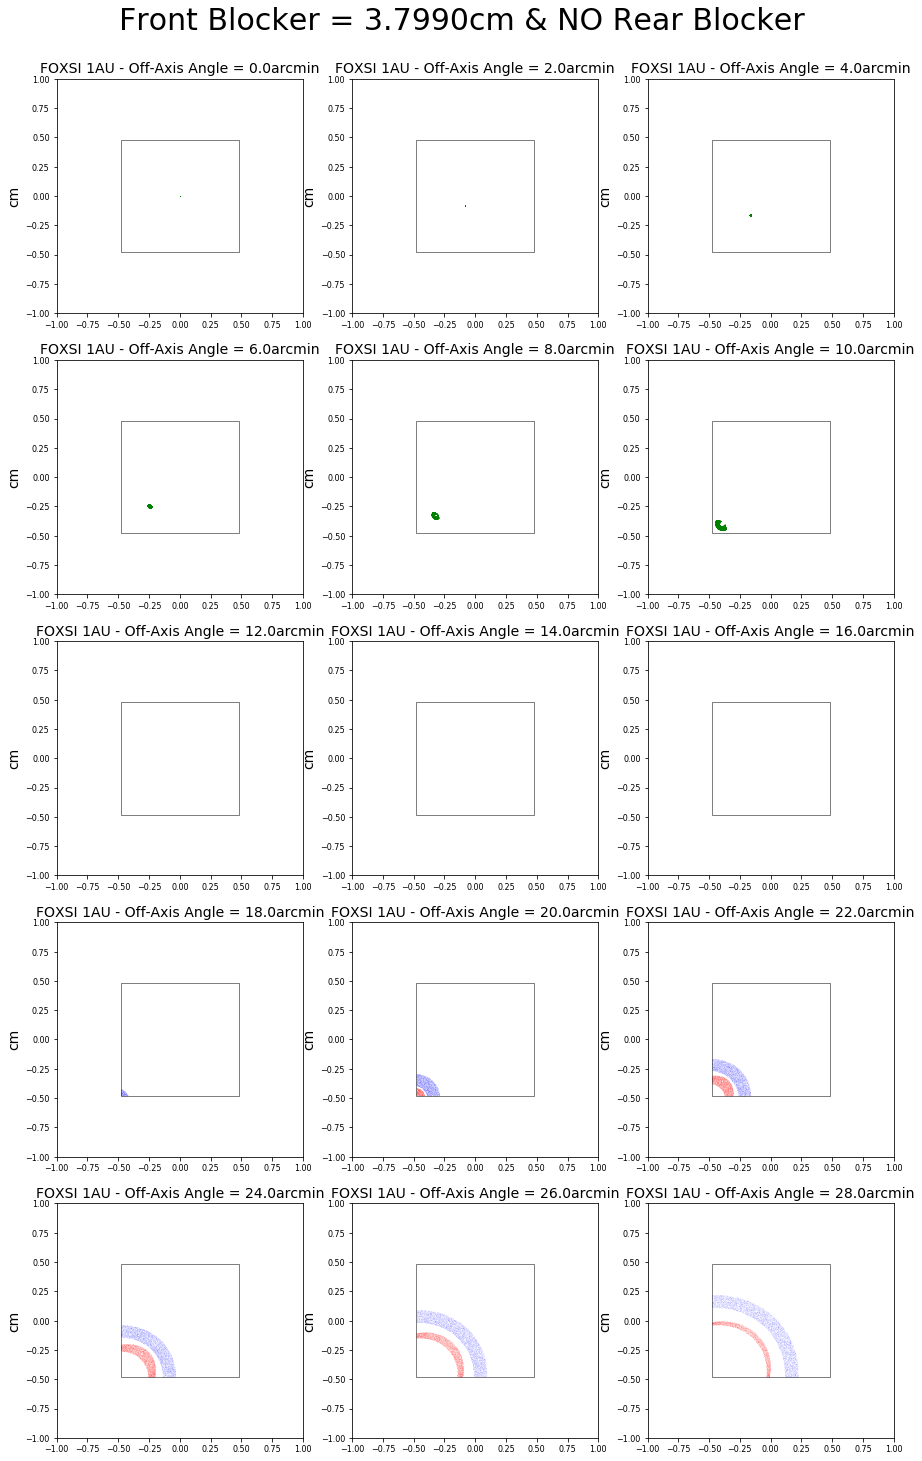

In [57]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.7990cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(F379_NR_All_Hx[i],F379_NR_All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(F379_NR_All_Px[i],F379_NR_All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(F379_NR_All_Dx[i],F379_NR_All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [55]:
Rout = 3.94
fbr = 3.7990
F379_NR_Doubles, F379_NR_Hyp, F379_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F379_NR_Doubles.append(len(F379_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F379_NR_Hyp.append(len(F379_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F379_NR_Par.append(len(F379_NR_All_Prays[i]) * (Rout**2 - fbr**2))

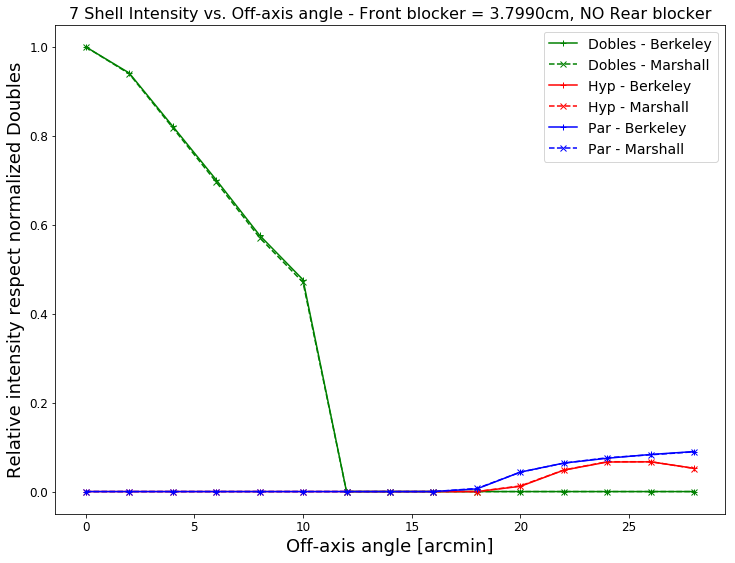

In [56]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7 Shell Intensity vs. Off-axis angle - Front blocker = 3.7990cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F379_NR_Doubles/max(np.array(F379_NR_Doubles)),'g+-',label='Dobles - Berkeley')
plt.plot(offaxisAngles, RonD_F379_NR/max(np.array(RonD_F379_NR)),'gx--',label='Dobles - Marshall')
plt.plot(offaxisAngles, F379_NR_Hyp/max(np.array(F379_NR_Doubles)),'r+-',label='Hyp - Berkeley')
plt.plot(offaxisAngles, RonH_F379_NR/max(np.array(RonD_F379_NR)),'rx--',label='Hyp - Marshall')
plt.plot(offaxisAngles, F379_NR_Par/max(np.array(F379_NR_Doubles)),'b+-',label='Par - Berkeley')
plt.plot(offaxisAngles, RonP_F379_NR/max(np.array(RonD_F379_NR)),'bx--',label='Par - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.legend(fontsize=14)
plt.show()

# All together

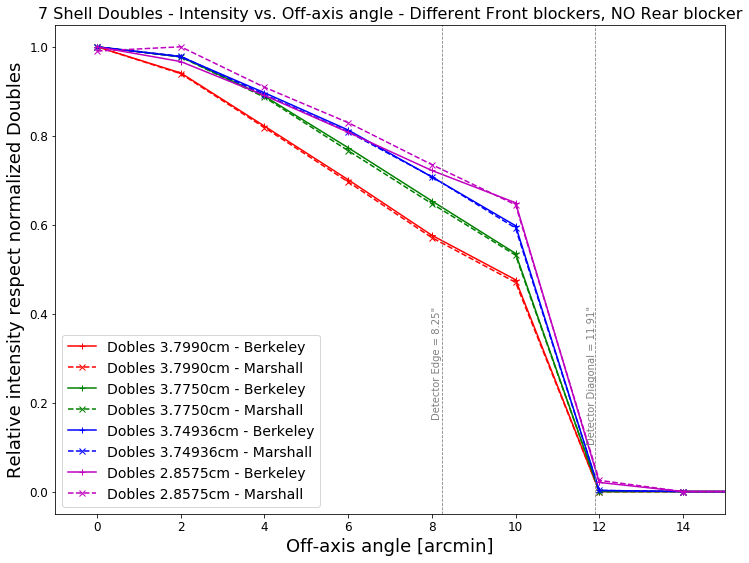

In [58]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7 Shell Doubles - Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F379_NR_Doubles/max(np.array(F379_NR_Doubles)),'r+-',label='Dobles 3.7990cm - Berkeley')
plt.plot(offaxisAngles, RonD_F379_NR/max(np.array(RonD_F379_NR)),'rx--',label='Dobles 3.7990cm - Marshall')
plt.plot(offaxisAngles, F377_NR_Doubles/max(np.array(F377_NR_Doubles)),'g+-',label='Dobles 3.7750cm - Berkeley')
plt.plot(offaxisAngles, RonD_F377_NR/max(np.array(RonD_F377_NR)),'gx--',label='Dobles 3.7750cm - Marshall')
plt.plot(offaxisAngles, F375_NR_Doubles/max(np.array(F375_NR_Doubles)),'b+-',label='Dobles 3.74936cm - Berkeley')
plt.plot(offaxisAngles, RonD_F375_NR/max(np.array(RonD_F375_NR)),'bx--',label='Dobles 3.74936cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'m+-',label='Dobles 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonD_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Dobles 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,15))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

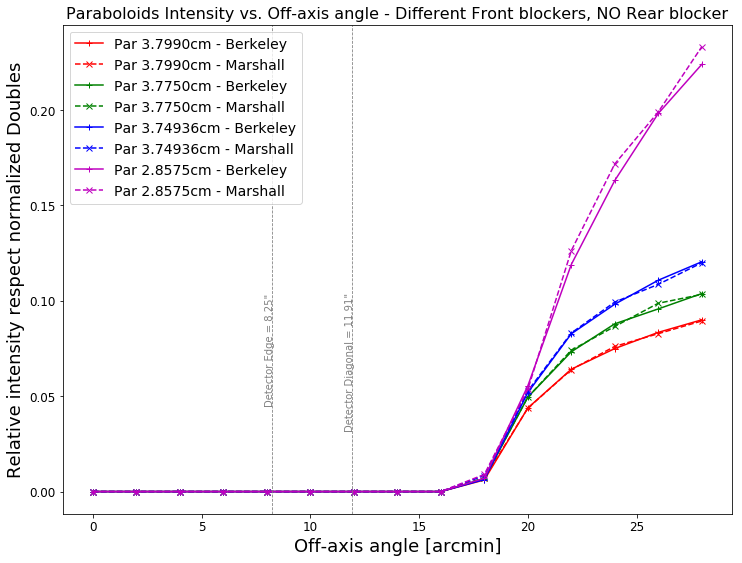

In [59]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Paraboloids Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F379_NR_Par/max(np.array(F379_NR_Doubles)),'r+-',label='Par 3.7990cm - Berkeley')
plt.plot(offaxisAngles, RonP_F379_NR/max(np.array(RonD_F379_NR)),'rx--',label='Par 3.7990cm - Marshall')
plt.plot(offaxisAngles, F377_NR_Par/max(np.array(F377_NR_Doubles)),'g+-',label='Par 3.7750cm - Berkeley')
plt.plot(offaxisAngles, RonP_F377_NR/max(np.array(RonD_F377_NR)),'gx--',label='Par 3.7750cm - Marshall')
plt.plot(offaxisAngles, F375_NR_Par/max(np.array(F375_NR_Doubles)),'b+-',label='Par 3.74936cm - Berkeley')
plt.plot(offaxisAngles, RonP_F375_NR/max(np.array(RonD_F375_NR)),'bx--',label='Par 3.74936cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'m+-',label='Par 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonP_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Par 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

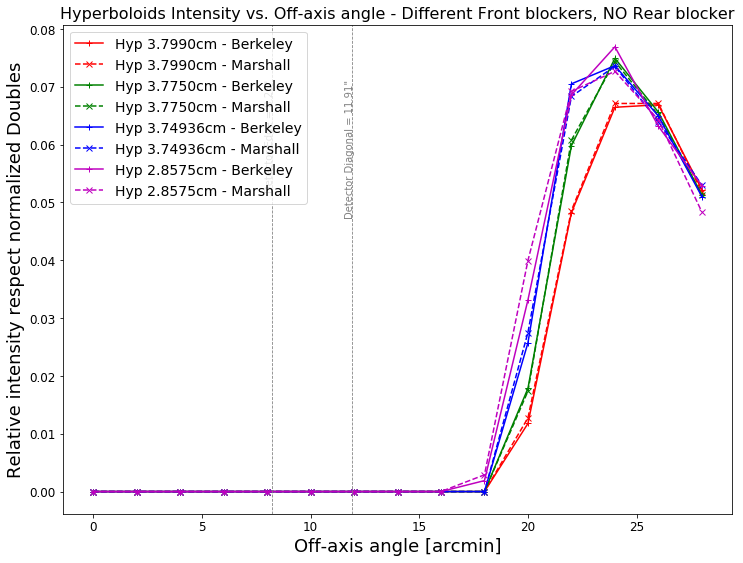

In [60]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Hyperboloids Intensity vs. Off-axis angle - Different Front blockers, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F379_NR_Hyp/max(np.array(F379_NR_Doubles)),'r+-',label='Hyp 3.7990cm - Berkeley')
plt.plot(offaxisAngles, RonH_F379_NR/max(np.array(RonD_F379_NR)),'rx--',label='Hyp 3.7990cm - Marshall')
plt.plot(offaxisAngles, F377_NR_Hyp/max(np.array(F377_NR_Doubles)),'g+-',label='Hyp 3.7750cm - Berkeley')
plt.plot(offaxisAngles, RonH_F377_NR/max(np.array(RonD_F377_NR)),'gx--',label='Hyp 3.7750cm - Marshall')
plt.plot(offaxisAngles, F375_NR_Hyp/max(np.array(F375_NR_Doubles)),'b+-',label='Hyp 3.74936cm - Berkeley')
plt.plot(offaxisAngles, RonH_F375_NR/max(np.array(RonD_F375_NR)),'bx--',label='Hyp 3.74936cm - Marshall')
plt.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'m+-',label='Hyp 2.8575cm - Berkeley')
plt.plot(offaxisAngles, RonH_F286_NR/max(np.array(RonD_F286_NR)),'mx--',label='Hyp 2.8575cm - Marshall')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

# Finding the most efficient size of the Rear blocker

## First by finding the biggest possible Rear blocker for an On-axis source

# Front = 3.74936cm

In [63]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import numpy as np

rbrs = np.arange(3.0,3.36,0.02) # Rear blocker radii

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for rbr in rbrs:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_'+str(rbr)+'cm.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.0cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.02cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.04cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.06cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.08cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.1cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/OnAxisRear/rays/rays_rbr_=_3.12cm.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/

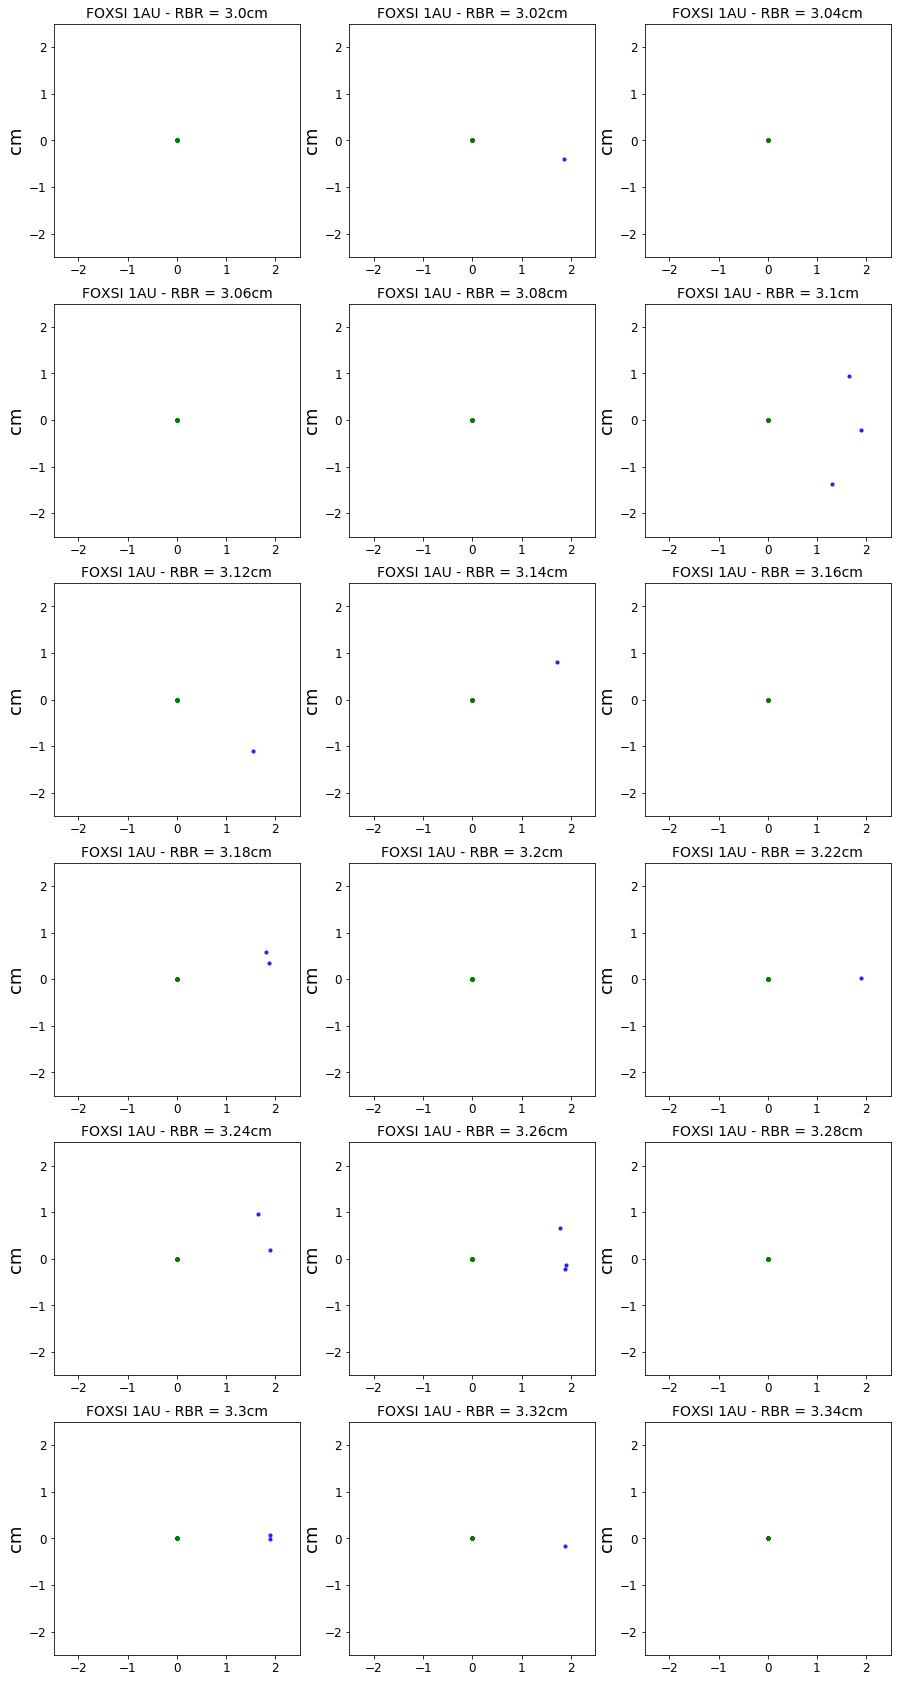

In [65]:
fig = plt.figure(figsize=(15,30))
for i, rbr in enumerate(rbrs):
    plt.subplot(6,3,i+1)
    plt.title('FOXSI 1AU - RBR = '+str(rbr)+'cm',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=10.,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=10.,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=10.,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
plt.show()

In [66]:
Rout = 3.94
fbr = 3.74936
Doubles, Hyp, Par = [], [], []
for i, rbr in enumerate(rbrs):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - fbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - fbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - fbr**2))

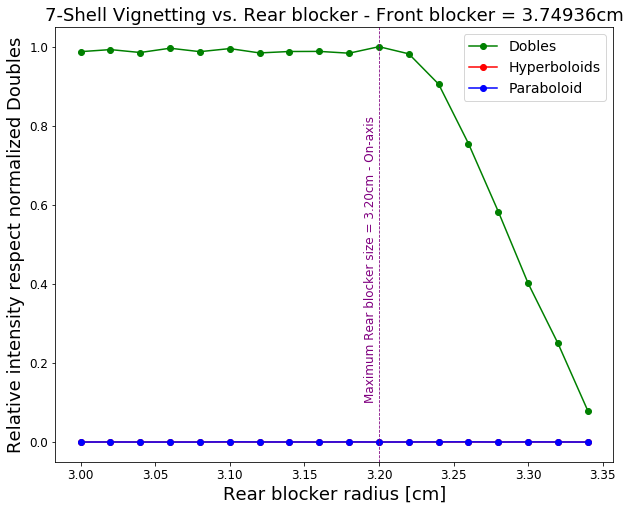

In [75]:
# Plotting :
fig = plt.figure(figsize=(10,8))
plt.title('7-Shell Vignetting vs. Rear blocker - Front blocker = 3.74936cm',fontsize=18)
plt.plot(rbrs, Doubles/max(np.array(Doubles)),'go-',label='Dobles')
plt.plot(rbrs, Hyp/max(np.array(Doubles)),'ro-',label='Hyperboloids')
plt.plot(rbrs, Par/max(np.array(Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Rear blocker radius [cm]',fontsize=18)
plt.axvline(3.20,color='purple',linestyle='--',lw=0.8)
plt.text(3.19,0.8,'Maximum Rear blocker size = 3.20cm - On-axis',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

## Rear Blocker most efficient size On-axis = 3.20cm

# I already run the rays... my task is to load them and graph them

## F = 3.74536cm & R=0.00cm

In [77]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_NR_All_Drays, F375_NR_All_Hrays, F375_NR_All_Prays = [], [], []
F375_NR_All_Dx, F375_NR_All_Dy, F375_NR_All_Hx, F375_NR_All_Hy, F375_NR_All_Px, F375_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_NR_All_Drays.append(Drays)
    F375_NR_All_Hrays.append(Hrays)
    F375_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_NR_All_Hx.append(Hx)
    F375_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_NR_All_Px.append(Px)
    F375_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_NR_All_Dx.append(Dx)
    F375_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R000/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [78]:
Rout = 3.94
fbr = 3.74936
F375_NR_Doubles, F375_NR_Hyp, F375_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_NR_Doubles.append(len(F375_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_NR_Hyp.append(len(F375_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_NR_Par.append(len(F375_NR_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=2.86cm

In [96]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 2.8575
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R286_All_Drays, F375_R286_All_Hrays, F375_R286_All_Prays = [], [], []
F375_R286_All_Dx, F375_R286_All_Dy, F375_R286_All_Hx, F375_R286_All_Hy, F375_R286_All_Px, F375_R286_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R286_All_Drays.append(Drays)
    F375_R286_All_Hrays.append(Hrays)
    F375_R286_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R286_All_Hx.append(Hx)
    F375_R286_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R286_All_Px.append(Px)
    F375_R286_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R286_All_Dx.append(Dx)
    F375_R286_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R286/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [97]:
Rout = 3.94
fbr = 3.74936
F375_R286_Doubles, F375_R286_Hyp, F375_R286_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R286_Doubles.append(len(F375_R286_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R286_Hyp.append(len(F375_R286_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R286_Par.append(len(F375_R286_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=3.12cm

In [79]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 3.12
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R312_All_Drays, F375_R312_All_Hrays, F375_R312_All_Prays = [], [], []
F375_R312_All_Dx, F375_R312_All_Dy, F375_R312_All_Hx, F375_R312_All_Hy, F375_R312_All_Px, F375_R312_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R312_All_Drays.append(Drays)
    F375_R312_All_Hrays.append(Hrays)
    F375_R312_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R312_All_Hx.append(Hx)
    F375_R312_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R312_All_Px.append(Px)
    F375_R312_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R312_All_Dx.append(Dx)
    F375_R312_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R312/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [80]:
Rout = 3.94
fbr = 3.74936
F375_R312_Doubles, F375_R312_Hyp, F375_R312_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R312_Doubles.append(len(F375_R312_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R312_Hyp.append(len(F375_R312_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R312_Par.append(len(F375_R312_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=3.14cm

In [81]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 3.14
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R314_All_Drays, F375_R314_All_Hrays, F375_R314_All_Prays = [], [], []
F375_R314_All_Dx, F375_R314_All_Dy, F375_R314_All_Hx, F375_R314_All_Hy, F375_R314_All_Px, F375_R314_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R314_All_Drays.append(Drays)
    F375_R314_All_Hrays.append(Hrays)
    F375_R314_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R314_All_Hx.append(Hx)
    F375_R314_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R314_All_Px.append(Px)
    F375_R314_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R314_All_Dx.append(Dx)
    F375_R314_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R314/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [82]:
Rout = 3.94
fbr = 3.74936
F375_R314_Doubles, F375_R314_Hyp, F375_R314_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R314_Doubles.append(len(F375_R314_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R314_Hyp.append(len(F375_R314_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R314_Par.append(len(F375_R314_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=3.16cm

In [83]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 3.16
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R316_All_Drays, F375_R316_All_Hrays, F375_R316_All_Prays = [], [], []
F375_R316_All_Dx, F375_R316_All_Dy, F375_R316_All_Hx, F375_R316_All_Hy, F375_R316_All_Px, F375_R316_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R316_All_Drays.append(Drays)
    F375_R316_All_Hrays.append(Hrays)
    F375_R316_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R316_All_Hx.append(Hx)
    F375_R316_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R316_All_Px.append(Px)
    F375_R316_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R316_All_Dx.append(Dx)
    F375_R316_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R316/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [84]:
Rout = 3.94
fbr = 3.74936
F375_R316_Doubles, F375_R316_Hyp, F375_R316_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R316_Doubles.append(len(F375_R316_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R316_Hyp.append(len(F375_R316_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R316_Par.append(len(F375_R316_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=3.18cm

In [85]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 3.18
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R318_All_Drays, F375_R318_All_Hrays, F375_R318_All_Prays = [], [], []
F375_R318_All_Dx, F375_R318_All_Dy, F375_R318_All_Hx, F375_R318_All_Hy, F375_R318_All_Px, F375_R318_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R318_All_Drays.append(Drays)
    F375_R318_All_Hrays.append(Hrays)
    F375_R318_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R318_All_Hx.append(Hx)
    F375_R318_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R318_All_Px.append(Px)
    F375_R318_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R318_All_Dx.append(Dx)
    F375_R318_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R318/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [86]:
Rout = 3.94
fbr = 3.74936
F375_R318_Doubles, F375_R318_Hyp, F375_R318_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R318_Doubles.append(len(F375_R318_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R318_Hyp.append(len(F375_R318_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R318_Par.append(len(F375_R318_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.74536cm & R=3.20cm

In [87]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.74936
rbr = 3.20
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F375_R320_All_Drays, F375_R320_All_Hrays, F375_R320_All_Prays = [], [], []
F375_R320_All_Dx, F375_R320_All_Dy, F375_R320_All_Hx, F375_R320_All_Hy, F375_R320_All_Px, F375_R320_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F375_R320_All_Drays.append(Drays)
    F375_R320_All_Hrays.append(Hrays)
    F375_R320_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F375_R320_All_Hx.append(Hx)
    F375_R320_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F375_R320_All_Px.append(Px)
    F375_R320_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F375_R320_All_Dx.append(Dx)
    F375_R320_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/7Shell/F375R320/rays_Angle_=_14.0.csv loaded.
Rays from /Us

In [88]:
Rout = 3.94
fbr = 3.74936
F375_R320_Doubles, F375_R320_Hyp, F375_R320_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F375_R320_Doubles.append(len(F375_R320_All_Drays[i]) * (Rout**2 - fbr**2))
    F375_R320_Hyp.append(len(F375_R320_All_Hrays[i]) * (Rout**2 - fbr**2))
    F375_R320_Par.append(len(F375_R320_All_Prays[i]) * (Rout**2 - fbr**2))

# Plotting

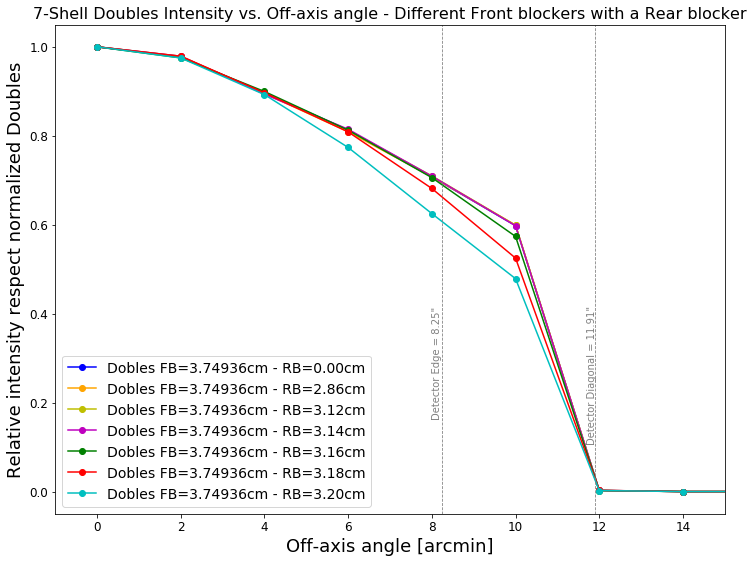

In [98]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7-Shell Doubles Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F375_NR_Doubles/max(np.array(F375_NR_Doubles)),'bo-',label='Dobles FB=3.74936cm - RB=0.00cm')
plt.plot(offaxisAngles, F375_R286_Doubles/max(np.array(F375_R286_Doubles)),'o-',label='Dobles FB=3.74936cm - RB=2.86cm',color='orange')
plt.plot(offaxisAngles, F375_R312_Doubles/max(np.array(F375_R312_Doubles)),'yo-',label='Dobles FB=3.74936cm - RB=3.12cm')
plt.plot(offaxisAngles, F375_R314_Doubles/max(np.array(F375_R314_Doubles)),'mo-',label='Dobles FB=3.74936cm - RB=3.14cm')
plt.plot(offaxisAngles, F375_R316_Doubles/max(np.array(F375_R316_Doubles)),'go-',label='Dobles FB=3.74936cm - RB=3.16cm')
plt.plot(offaxisAngles, F375_R318_Doubles/max(np.array(F375_R318_Doubles)),'ro-',label='Dobles FB=3.74936cm - RB=3.18cm')
plt.plot(offaxisAngles, F375_R320_Doubles/max(np.array(F375_R320_Doubles)),'co-',label='Dobles FB=3.74936cm - RB=3.20cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,15))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

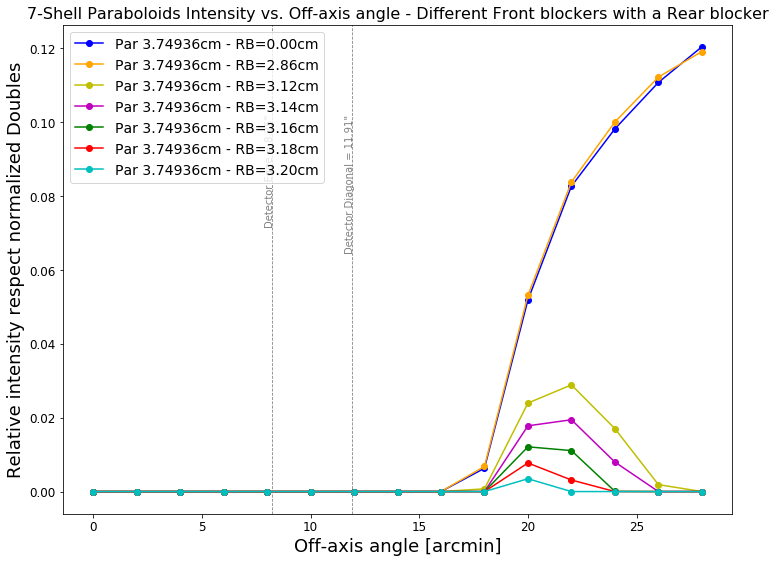

In [99]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7-Shell Paraboloids Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F375_NR_Par/max(np.array(F375_NR_Doubles)),'bo-',label='Par 3.74936cm - RB=0.00cm')
plt.plot(offaxisAngles, F375_R286_Par/max(np.array(F375_R286_Doubles)),'o-',label='Par 3.74936cm - RB=2.86cm',color='orange')
plt.plot(offaxisAngles, F375_R312_Par/max(np.array(F375_R312_Doubles)),'yo-',label='Par 3.74936cm - RB=3.12cm')
plt.plot(offaxisAngles, F375_R314_Par/max(np.array(F375_R314_Doubles)),'mo-',label='Par 3.74936cm - RB=3.14cm')
plt.plot(offaxisAngles, F375_R316_Par/max(np.array(F375_R316_Doubles)),'go-',label='Par 3.74936cm - RB=3.16cm')
plt.plot(offaxisAngles, F375_R318_Par/max(np.array(F375_R318_Doubles)),'ro-',label='Par 3.74936cm - RB=3.18cm')
plt.plot(offaxisAngles, F375_R320_Par/max(np.array(F375_R320_Doubles)),'co-',label='Par 3.74936cm - RB=3.20cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

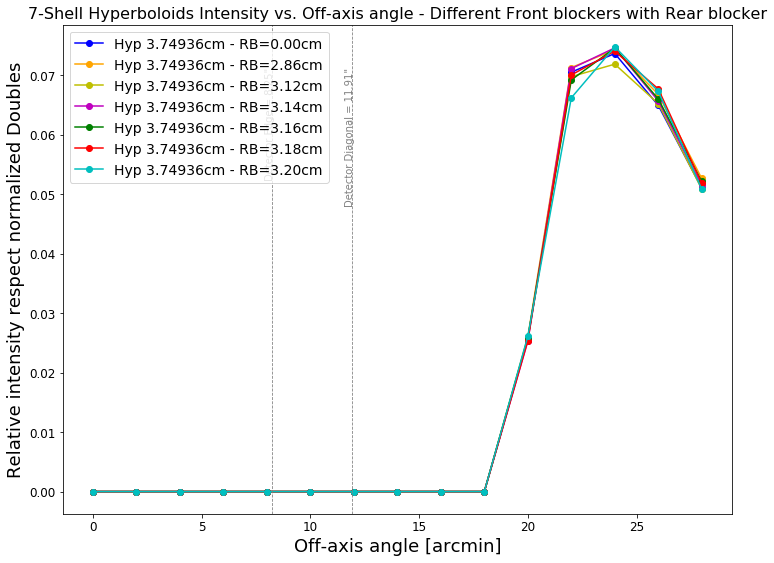

In [100]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('7-Shell Hyperboloids Intensity vs. Off-axis angle - Different Front blockers with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F375_NR_Hyp/max(np.array(F375_NR_Doubles)),'bo-',label='Hyp 3.74936cm - RB=0.00cm')
plt.plot(offaxisAngles, F375_R286_Hyp/max(np.array(F375_R286_Doubles)),'o-',label='Hyp 3.74936cm - RB=2.86cm',color='orange')
plt.plot(offaxisAngles, F375_R312_Hyp/max(np.array(F375_R312_Doubles)),'yo-',label='Hyp 3.74936cm - RB=3.12cm')
plt.plot(offaxisAngles, F375_R314_Hyp/max(np.array(F375_R314_Doubles)),'mo-',label='Hyp 3.74936cm - RB=3.14cm')
plt.plot(offaxisAngles, F375_R316_Hyp/max(np.array(F375_R316_Doubles)),'go-',label='Hyp 3.74936cm - RB=3.16cm')
plt.plot(offaxisAngles, F375_R318_Hyp/max(np.array(F375_R318_Doubles)),'ro-',label='Hyp 3.74936cm - RB=3.18cm')
plt.plot(offaxisAngles, F375_R320_Hyp/max(np.array(F375_R320_Doubles)),'co-',label='Hyp 3.74936cm - RB=3.20cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

# It seems that the most efficient sizes for the blockers of a 7-shell FOXSI module are:
# Front = 3.74936cm
# Rear = 3.14cm